In [10]:
%matplotlib inline

## Imports

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

In [11]:
import matplotlib.pyplot as plt

In [13]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams["font.size"] = 20

## Read-in Data and Form Validation Set

In [2]:
train_csv_df = pd.read_csv("nlp-getting-started/train.csv")

In [3]:
train_csv_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [4]:
train_df, test_df = train_test_split(train_csv_df, train_size=0.85, random_state=1)

## Get Bag of Words Word Vectors

In [5]:
vectorizer = CountVectorizer()
train_bow_vectors = vectorizer.fit_transform(train_df["text"])
test_bow_vectors = vectorizer.transform(test_df["text"])

In [6]:
(train_bow_vectors.shape, test_bow_vectors.shape, 
 train_bow_vectors.todense()[:3], test_bow_vectors.todense()[:3])

((6471, 19365),
 (1142, 19365),
 matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]),
 matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]))

## Approach 1: Bag of Words Word Count Vectors and Logistic Regression

Our approach here is to use (bag of words) word count vectors as the feature and logistic regression as the model.  We will implement logistic regression in tensorflow, as this will prepare us for more sophisticated neural networks later.  In our first pass, we will not use regularization; we will then find good values for regularization.

### Model 1: No Regularization

In [7]:
model_1 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

2023-06-15 14:44:33.898679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.BinaryCrossentropy(),
                       tf.keras.metrics.AUC()])

In [9]:
history_1 = model_1.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
           validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 5ms/step - loss: 0.6467 - binary_accuracy: 0.7211 - true_positives: 1469.0000 - false_positives: 489.0000 - true_negatives: 3197.0000 - false_negatives: 1316.0000 - binary_crossentropy: 0.6467 - auc: 0.7615 - val_loss: 0.6095 - val_binary_accuracy: 0.7601 - val_true_positives: 268.0000 - val_false_positives: 56.0000 - val_true_negatives: 600.0000 - val_false_negatives: 218.0000 - val_binary_crossentropy: 0.6095 - val_auc: 0.8035
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5644 - binary_accuracy: 0.8050 - true_positives: 1802.0000 - false_positives: 279.0000 - true_negatives: 3407.0000 - false_negatives: 983.0000 - binary_crossentropy: 0.5644 - auc: 0.8582 - val_loss: 0.5650 - val_binary_accuracy: 0.7644 - val_true_positives: 287.0000 - val_false_positives: 70.0000 - val_true_negatives: 586.0000 - val_false_negatives: 199.0000 - val_binary_crossentropy: 0.5650 - val_auc: 0.8232
Epoch 3/100
203/203

Epoch 18/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2342 - binary_accuracy: 0.9388 - true_positives: 2462.0000 - false_positives: 73.0000 - true_negatives: 3613.0000 - false_negatives: 323.0000 - binary_crossentropy: 0.2342 - auc: 0.9860 - val_loss: 0.4437 - val_binary_accuracy: 0.7968 - val_true_positives: 333.0000 - val_false_positives: 79.0000 - val_true_negatives: 577.0000 - val_false_negatives: 153.0000 - val_binary_crossentropy: 0.4437 - val_auc: 0.8615
Epoch 19/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2258 - binary_accuracy: 0.9424 - true_positives: 2480.0000 - false_positives: 68.0000 - true_negatives: 3618.0000 - false_negatives: 305.0000 - binary_crossentropy: 0.2258 - auc: 0.9875 - val_loss: 0.4430 - val_binary_accuracy: 0.7968 - val_true_positives: 333.0000 - val_false_positives: 79.0000 - val_true_negatives: 577.0000 - val_false_negatives: 153.0000 - val_binary_crossentropy: 0.4430 - val_auc: 0.8612
Epoch 20/100
203/203

Epoch 35/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1365 - binary_accuracy: 0.9697 - true_positives: 2619.0000 - false_positives: 30.0000 - true_negatives: 3656.0000 - false_negatives: 166.0000 - binary_crossentropy: 0.1365 - auc: 0.9973 - val_loss: 0.4481 - val_binary_accuracy: 0.7977 - val_true_positives: 336.0000 - val_false_positives: 81.0000 - val_true_negatives: 575.0000 - val_false_negatives: 150.0000 - val_binary_crossentropy: 0.4481 - val_auc: 0.8588
Epoch 36/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1327 - binary_accuracy: 0.9711 - true_positives: 2630.0000 - false_positives: 32.0000 - true_negatives: 3654.0000 - false_negatives: 155.0000 - binary_crossentropy: 0.1327 - auc: 0.9975 - val_loss: 0.4491 - val_binary_accuracy: 0.7986 - val_true_positives: 336.0000 - val_false_positives: 80.0000 - val_true_negatives: 576.0000 - val_false_negatives: 150.0000 - val_binary_crossentropy: 0.4491 - val_auc: 0.8588
Epoch 37/100
203/203

Epoch 52/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0880 - binary_accuracy: 0.9827 - true_positives: 2692.0000 - false_positives: 19.0000 - true_negatives: 3667.0000 - false_negatives: 93.0000 - binary_crossentropy: 0.0880 - auc: 0.9993 - val_loss: 0.4723 - val_binary_accuracy: 0.7942 - val_true_positives: 336.0000 - val_false_positives: 85.0000 - val_true_negatives: 571.0000 - val_false_negatives: 150.0000 - val_binary_crossentropy: 0.4723 - val_auc: 0.8541
Epoch 53/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0859 - binary_accuracy: 0.9841 - true_positives: 2700.0000 - false_positives: 18.0000 - true_negatives: 3668.0000 - false_negatives: 85.0000 - binary_crossentropy: 0.0859 - auc: 0.9993 - val_loss: 0.4742 - val_binary_accuracy: 0.7960 - val_true_positives: 337.0000 - val_false_positives: 84.0000 - val_true_negatives: 572.0000 - val_false_negatives: 149.0000 - val_binary_crossentropy: 0.4742 - val_auc: 0.8537
Epoch 54/100
203/203 [

Epoch 69/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0605 - binary_accuracy: 0.9889 - true_positives: 2732.0000 - false_positives: 19.0000 - true_negatives: 3667.0000 - false_negatives: 53.0000 - binary_crossentropy: 0.0605 - auc: 0.9997 - val_loss: 0.5063 - val_binary_accuracy: 0.7881 - val_true_positives: 332.0000 - val_false_positives: 88.0000 - val_true_negatives: 568.0000 - val_false_negatives: 154.0000 - val_binary_crossentropy: 0.5063 - val_auc: 0.8489
Epoch 70/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0593 - binary_accuracy: 0.9887 - true_positives: 2731.0000 - false_positives: 19.0000 - true_negatives: 3667.0000 - false_negatives: 54.0000 - binary_crossentropy: 0.0593 - auc: 0.9997 - val_loss: 0.5084 - val_binary_accuracy: 0.7872 - val_true_positives: 332.0000 - val_false_positives: 89.0000 - val_true_negatives: 567.0000 - val_false_negatives: 154.0000 - val_binary_crossentropy: 0.5084 - val_auc: 0.8487
Epoch 71/100
203/203 [

Epoch 86/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0437 - binary_accuracy: 0.9932 - true_positives: 2758.0000 - false_positives: 17.0000 - true_negatives: 3669.0000 - false_negatives: 27.0000 - binary_crossentropy: 0.0437 - auc: 0.9998 - val_loss: 0.5468 - val_binary_accuracy: 0.7855 - val_true_positives: 333.0000 - val_false_positives: 92.0000 - val_true_negatives: 564.0000 - val_false_negatives: 153.0000 - val_binary_crossentropy: 0.5468 - val_auc: 0.8439
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0430 - binary_accuracy: 0.9929 - true_positives: 2755.0000 - false_positives: 16.0000 - true_negatives: 3670.0000 - false_negatives: 30.0000 - binary_crossentropy: 0.0430 - auc: 0.9999 - val_loss: 0.5491 - val_binary_accuracy: 0.7863 - val_true_positives: 334.0000 - val_false_positives: 92.0000 - val_true_negatives: 564.0000 - val_false_negatives: 152.0000 - val_binary_crossentropy: 0.5491 - val_auc: 0.8437
Epoch 88/100
203/203 [

Text(0, 0.5, 'Accuracy')

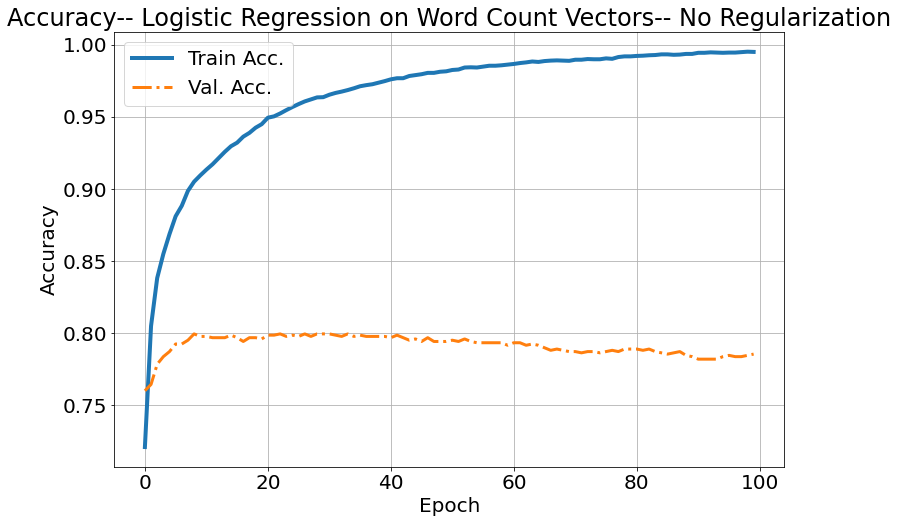

In [17]:
plt.title("Accuracy-- Logistic Regression on Word Count Vectors-- No Regularization")

plt.plot(history_1.history["binary_accuracy"], label = "Train Acc.", lw=4)
plt.plot(history_1.history["val_binary_accuracy"], label = "Val. Acc.", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Binary Cross Entropy')

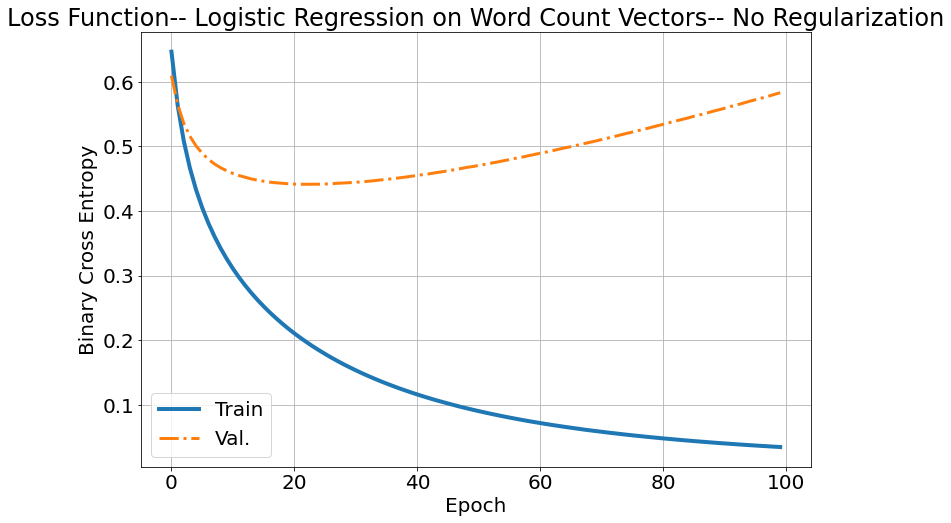

In [27]:
plt.title("Loss Function-- Logistic Regression on Word Count Vectors-- No Regularization")

plt.plot(history_1.history["loss"], label = "Train", lw=4)
plt.plot(history_1.history["val_loss"], label = "Val.", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

This is a textbook plot of overfitting, so we will try regularization

### Models 2-6: Various Values for Regularization

In [20]:
model_2 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                         kernel_regularizer=tf.keras.regularizers.l2(1.0))
)

In [21]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

In [22]:
history_2 = model_2.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
                        validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 5ms/step - loss: 0.7480 - binary_accuracy: 0.5763 - auc_1: 0.6416 - val_loss: 0.6897 - val_binary_accuracy: 0.5814 - val_auc_1: 0.6894
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6881 - binary_accuracy: 0.5698 - auc_1: 0.6648 - val_loss: 0.6867 - val_binary_accuracy: 0.5736 - val_auc_1: 0.6961
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6866 - binary_accuracy: 0.5696 - auc_1: 0.6817 - val_loss: 0.6860 - val_binary_accuracy: 0.5736 - val_auc_1: 0.6854
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6861 - binary_accuracy: 0.5695 - auc_1: 0.6842 - val_loss: 0.6853 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6958
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6860 - binary_accuracy: 0.5696 - auc_1: 0.6883 - val_loss: 0.6850 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6884
Epoch 6/100
203/203 [==============

203/203 [==============================] - 1s 3ms/step - loss: 0.6865 - binary_accuracy: 0.5696 - auc_1: 0.6915 - val_loss: 0.6853 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6879
Epoch 86/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6864 - binary_accuracy: 0.5696 - auc_1: 0.6908 - val_loss: 0.6858 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6940
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6865 - binary_accuracy: 0.5696 - auc_1: 0.6862 - val_loss: 0.6854 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6920
Epoch 88/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6863 - binary_accuracy: 0.5696 - auc_1: 0.6921 - val_loss: 0.6855 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6939
Epoch 89/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6865 - binary_accuracy: 0.5696 - auc_1: 0.6889 - val_loss: 0.6853 - val_binary_accuracy: 0.5744 - val_auc_1: 0.6865
Epoch 90/100
203/203 [=====================

Text(0, 0.5, 'Binary Cross Entropy')

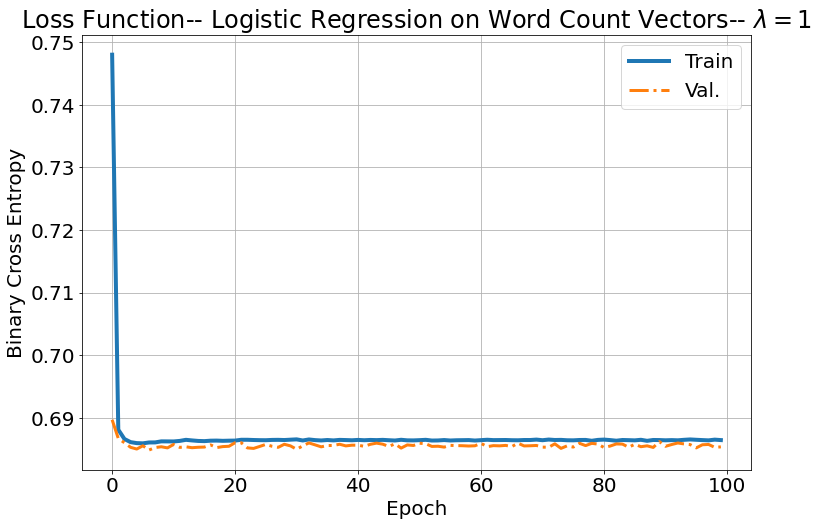

In [25]:
plt.title("Loss Function-- Logistic Regression on Word Count Vectors-- $\lambda = 1$")

plt.plot(history_2.history["loss"], label = "Train", lw=4)
plt.plot(history_2.history["val_loss"], label = "Val.", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

Too much regularization!  We will go 100x smaller for model 3.

In [29]:
model_3 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                         kernel_regularizer=tf.keras.regularizers.l2(0.01))
)

In [30]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

In [31]:
history_3 = model_3.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
                        validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 5ms/step - loss: 0.6603 - binary_accuracy: 0.7320 - auc_2: 0.7723 - val_loss: 0.6383 - val_binary_accuracy: 0.7417 - val_auc_2: 0.7956
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6251 - binary_accuracy: 0.7629 - auc_2: 0.8105 - val_loss: 0.6245 - val_binary_accuracy: 0.7434 - val_auc_2: 0.8002
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6147 - binary_accuracy: 0.7654 - auc_2: 0.8164 - val_loss: 0.6191 - val_binary_accuracy: 0.7443 - val_auc_2: 0.8031
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6101 - binary_accuracy: 0.7674 - auc_2: 0.8203 - val_loss: 0.6168 - val_binary_accuracy: 0.7434 - val_auc_2: 0.8032
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.6076 - binary_accuracy: 0.7663 - auc_2: 0.8203 - val_loss: 0.6153 - val_binary_accuracy: 0.7399 - val_auc_2: 0.8017
Epoch 6/100
203/203 [==============

203/203 [==============================] - 1s 3ms/step - loss: 0.6017 - binary_accuracy: 0.7506 - auc_2: 0.8148 - val_loss: 0.6117 - val_binary_accuracy: 0.7259 - val_auc_2: 0.7950
Epoch 86/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6018 - binary_accuracy: 0.7487 - auc_2: 0.8137 - val_loss: 0.6116 - val_binary_accuracy: 0.7285 - val_auc_2: 0.7944
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6019 - binary_accuracy: 0.7487 - auc_2: 0.8133 - val_loss: 0.6119 - val_binary_accuracy: 0.7259 - val_auc_2: 0.7952
Epoch 88/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6018 - binary_accuracy: 0.7500 - auc_2: 0.8132 - val_loss: 0.6115 - val_binary_accuracy: 0.7312 - val_auc_2: 0.7958
Epoch 89/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6018 - binary_accuracy: 0.7475 - auc_2: 0.8134 - val_loss: 0.6116 - val_binary_accuracy: 0.7285 - val_auc_2: 0.7958
Epoch 90/100
203/203 [=====================

Text(0, 0.5, 'Binary Cross Entropy')

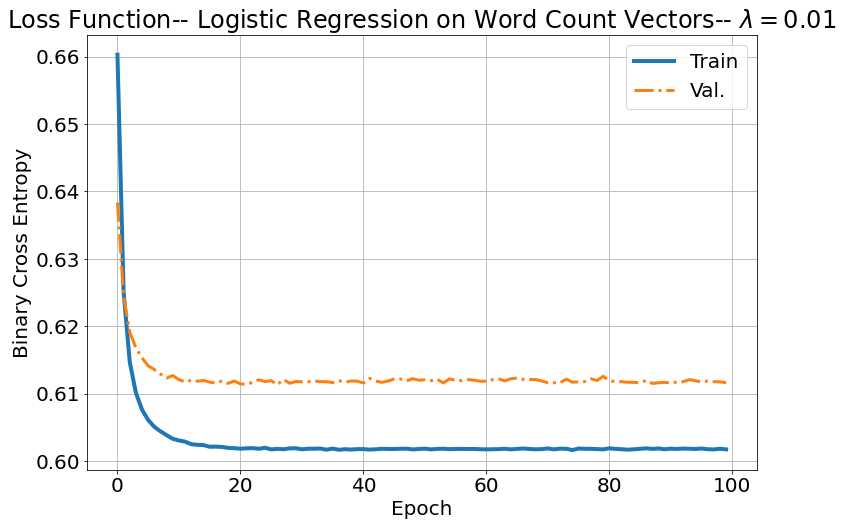

In [32]:
plt.title("Loss Function-- Logistic Regression on Word Count Vectors-- $\lambda = 0.01$")

plt.plot(history_3.history["loss"], label = "Train", lw=4)
plt.plot(history_3.history["val_loss"], label = "Val.", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

Text(0, 0.5, 'Accuracy')

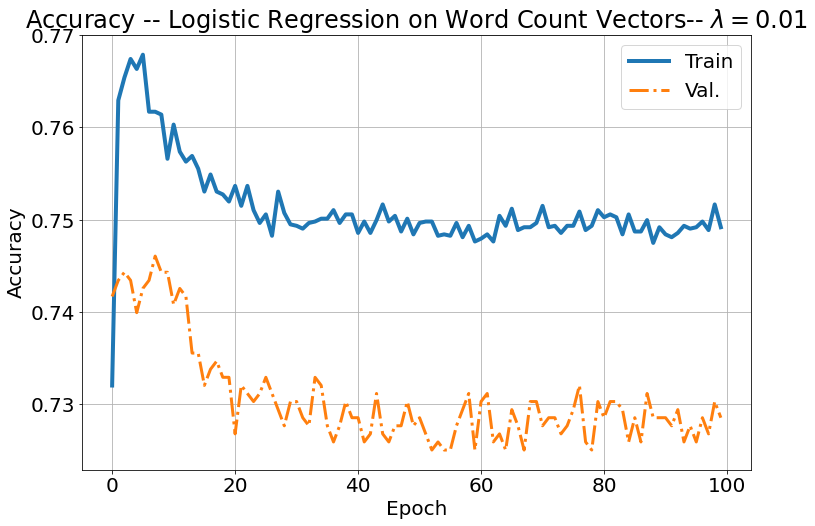

In [33]:
plt.title("Accuracy -- Logistic Regression on Word Count Vectors-- $\lambda = 0.01$")

plt.plot(history_3.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_3.history["val_binary_accuracy"], label = "Val.", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Still too much regularization.  In our no regularization case we had validation set accuracy around
0.8, so we can do better.  To test this, we go down by another 2 orders of magnitude

In [34]:
model_4 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                         kernel_regularizer=tf.keras.regularizers.l2(1e-4))
)

In [35]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

In [36]:
history_4 = model_4.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
                        validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 6ms/step - loss: 0.6479 - binary_accuracy: 0.7243 - auc_3: 0.7767 - val_loss: 0.6107 - val_binary_accuracy: 0.7539 - val_auc_3: 0.8046
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.5665 - binary_accuracy: 0.8073 - auc_3: 0.8565 - val_loss: 0.5671 - val_binary_accuracy: 0.7697 - val_auc_3: 0.8242
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5132 - binary_accuracy: 0.8353 - auc_3: 0.8892 - val_loss: 0.5405 - val_binary_accuracy: 0.7706 - val_auc_3: 0.8348
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4748 - binary_accuracy: 0.8535 - auc_3: 0.9098 - val_loss: 0.5226 - val_binary_accuracy: 0.7785 - val_auc_3: 0.8427
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4453 - binary_accuracy: 0.8669 - auc_3: 0.9246 - val_loss: 0.5102 - val_binary_accuracy: 0.7881 - val_auc_3: 0.8482
Epoch 6/100
203/203 [==============

203/203 [==============================] - 1s 3ms/step - loss: 0.2777 - binary_accuracy: 0.9594 - auc_3: 0.9933 - val_loss: 0.5255 - val_binary_accuracy: 0.7942 - val_auc_3: 0.8633
Epoch 86/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2776 - binary_accuracy: 0.9586 - auc_3: 0.9933 - val_loss: 0.5254 - val_binary_accuracy: 0.7933 - val_auc_3: 0.8634
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2776 - binary_accuracy: 0.9587 - auc_3: 0.9933 - val_loss: 0.5257 - val_binary_accuracy: 0.7916 - val_auc_3: 0.8634
Epoch 88/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2776 - binary_accuracy: 0.9584 - auc_3: 0.9933 - val_loss: 0.5257 - val_binary_accuracy: 0.7916 - val_auc_3: 0.8634
Epoch 89/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2776 - binary_accuracy: 0.9595 - auc_3: 0.9933 - val_loss: 0.5259 - val_binary_accuracy: 0.7925 - val_auc_3: 0.8632
Epoch 90/100
203/203 [=====================

Text(0, 0.5, 'Accuracy')

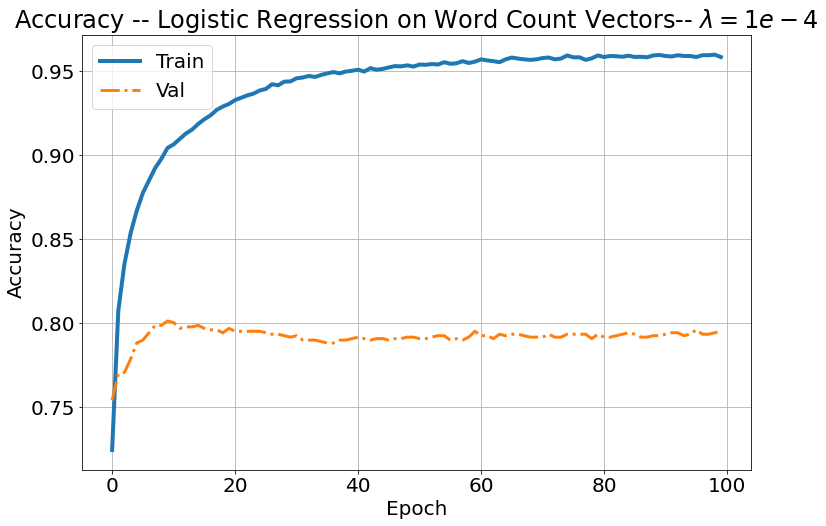

In [37]:
plt.title("Accuracy -- Logistic Regression on Word Count Vectors-- $\lambda = 1e-4$")

plt.plot(history_4.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_4.history["val_binary_accuracy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Binary Cross Entropy')

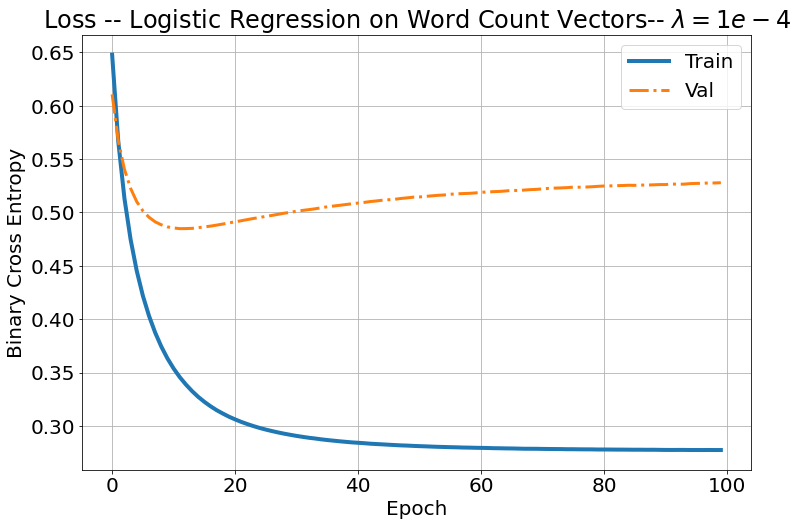

In [38]:
plt.title("Loss -- Logistic Regression on Word Count Vectors-- $\lambda = 1e-4$")

plt.plot(history_4.history["loss"], label = "Train", lw=4)
plt.plot(history_4.history["val_loss"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

Here we still have overfitting, but we get validation set accuracy to about 80%.  We now try 1e-3 as the regularization to see if we do better (there is no point in trying lower values)

In [39]:
model_5 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                         kernel_regularizer=tf.keras.regularizers.l2(1e-3))
)

In [40]:
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

In [41]:
history_5 = model_5.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
                        validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 7ms/step - loss: 0.6497 - binary_accuracy: 0.7280 - auc_4: 0.7702 - val_loss: 0.6152 - val_binary_accuracy: 0.7522 - val_auc_4: 0.8025
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.5793 - binary_accuracy: 0.7996 - auc_4: 0.8484 - val_loss: 0.5814 - val_binary_accuracy: 0.7671 - val_auc_4: 0.8223
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5417 - binary_accuracy: 0.8244 - auc_4: 0.8755 - val_loss: 0.5646 - val_binary_accuracy: 0.7653 - val_auc_4: 0.8314
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5195 - binary_accuracy: 0.8362 - auc_4: 0.8908 - val_loss: 0.5554 - val_binary_accuracy: 0.7802 - val_auc_4: 0.8389
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5056 - binary_accuracy: 0.8456 - auc_4: 0.9012 - val_loss: 0.5499 - val_binary_accuracy: 0.7828 - val_auc_4: 0.8430
Epoch 6/100
203/203 [==============

203/203 [==============================] - 1s 3ms/step - loss: 0.4687 - binary_accuracy: 0.8623 - auc_4: 0.9286 - val_loss: 0.5466 - val_binary_accuracy: 0.7916 - val_auc_4: 0.8511
Epoch 86/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4686 - binary_accuracy: 0.8626 - auc_4: 0.9281 - val_loss: 0.5469 - val_binary_accuracy: 0.7898 - val_auc_4: 0.8510
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4686 - binary_accuracy: 0.8628 - auc_4: 0.9286 - val_loss: 0.5466 - val_binary_accuracy: 0.7898 - val_auc_4: 0.8513
Epoch 88/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4686 - binary_accuracy: 0.8623 - auc_4: 0.9287 - val_loss: 0.5466 - val_binary_accuracy: 0.7898 - val_auc_4: 0.8511
Epoch 89/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4686 - binary_accuracy: 0.8609 - auc_4: 0.9287 - val_loss: 0.5466 - val_binary_accuracy: 0.7881 - val_auc_4: 0.8510
Epoch 90/100
203/203 [=====================

Text(0, 0.5, 'Accuracy')

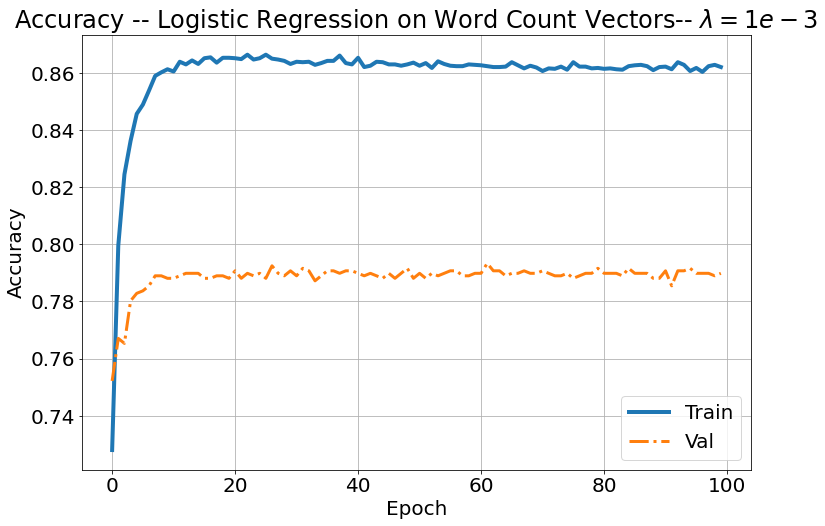

In [42]:
plt.title("Accuracy -- Logistic Regression on Word Count Vectors-- $\lambda = 1e-3$")

plt.plot(history_5.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_5.history["val_binary_accuracy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Binary Cross Entropy')

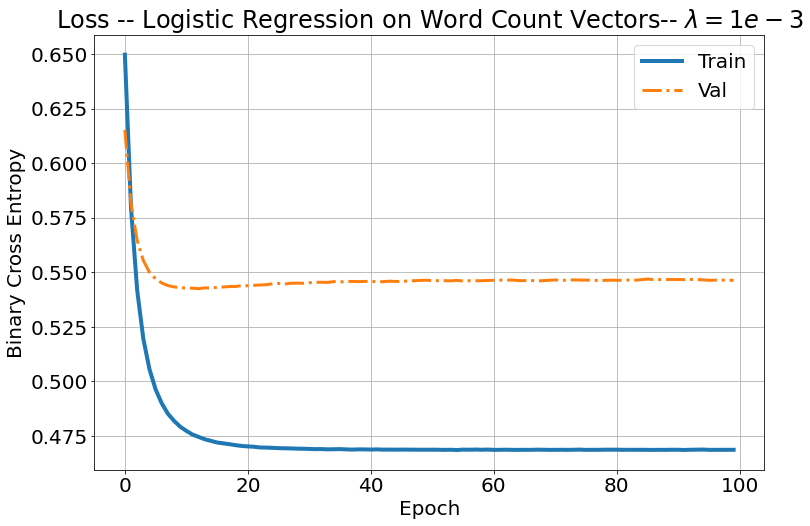

In [43]:
plt.title("Loss -- Logistic Regression on Word Count Vectors-- $\lambda = 1e-3$")

plt.plot(history_5.history["loss"], label = "Train", lw=4)
plt.plot(history_5.history["val_loss"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

So we still have some overfitting and a value for validation set accuracy of about 80%.  We will try one last value, then move on to other models and feature sets.

In [44]:
model_6 = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                         kernel_regularizer=tf.keras.regularizers.l2(3e-3))
)

In [45]:
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

In [46]:
history_6 = model_6.fit(x=train_bow_vectors.todense(), y=train_df["target"], epochs=100, 
                        validation_data=(test_bow_vectors.todense(), test_df["target"]))

Epoch 1/100
203/203 [==============================] - 2s 7ms/step - loss: 0.6535 - binary_accuracy: 0.7283 - auc_5: 0.7675 - val_loss: 0.6235 - val_binary_accuracy: 0.7434 - val_auc_5: 0.7987
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5972 - binary_accuracy: 0.7886 - auc_5: 0.8357 - val_loss: 0.5986 - val_binary_accuracy: 0.7548 - val_auc_5: 0.8170
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5735 - binary_accuracy: 0.8027 - auc_5: 0.8557 - val_loss: 0.5878 - val_binary_accuracy: 0.7609 - val_auc_5: 0.8236
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5618 - binary_accuracy: 0.8081 - auc_5: 0.8637 - val_loss: 0.5821 - val_binary_accuracy: 0.7688 - val_auc_5: 0.8282
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5553 - binary_accuracy: 0.8130 - auc_5: 0.8691 - val_loss: 0.5792 - val_binary_accuracy: 0.7662 - val_auc_5: 0.8311
Epoch 6/100
203/203 [==============

203/203 [==============================] - 1s 4ms/step - loss: 0.5415 - binary_accuracy: 0.8096 - auc_5: 0.8776 - val_loss: 0.5752 - val_binary_accuracy: 0.7697 - val_auc_5: 0.8313
Epoch 86/100
203/203 [==============================] - 1s 4ms/step - loss: 0.5416 - binary_accuracy: 0.8119 - auc_5: 0.8778 - val_loss: 0.5752 - val_binary_accuracy: 0.7644 - val_auc_5: 0.8308
Epoch 87/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5415 - binary_accuracy: 0.8129 - auc_5: 0.8766 - val_loss: 0.5751 - val_binary_accuracy: 0.7680 - val_auc_5: 0.8313
Epoch 88/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5416 - binary_accuracy: 0.8107 - auc_5: 0.8769 - val_loss: 0.5748 - val_binary_accuracy: 0.7688 - val_auc_5: 0.8315
Epoch 89/100
203/203 [==============================] - 1s 3ms/step - loss: 0.5415 - binary_accuracy: 0.8116 - auc_5: 0.8771 - val_loss: 0.5753 - val_binary_accuracy: 0.7671 - val_auc_5: 0.8309
Epoch 90/100
203/203 [=====================

Text(0, 0.5, 'Accuracy')

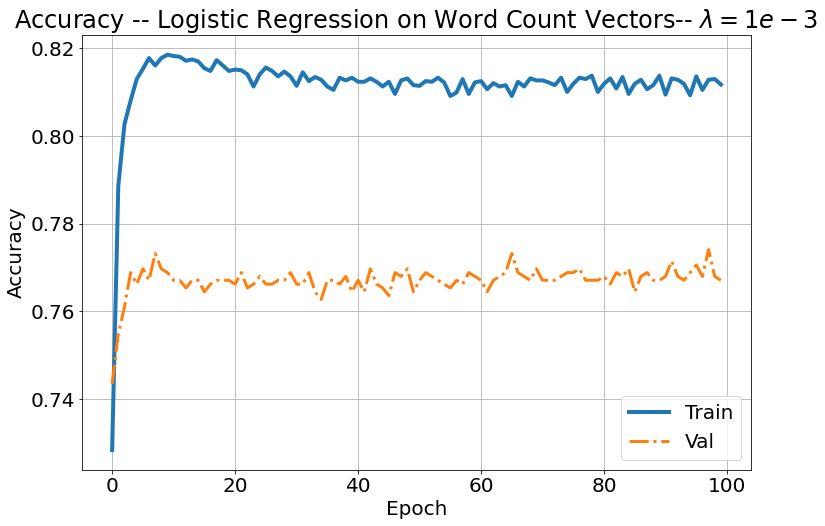

In [47]:
plt.title("Accuracy -- Logistic Regression on Word Count Vectors-- $\lambda = 3e-3$")

plt.plot(history_6.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_6.history["val_binary_accuracy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Binary Cross Entropy')

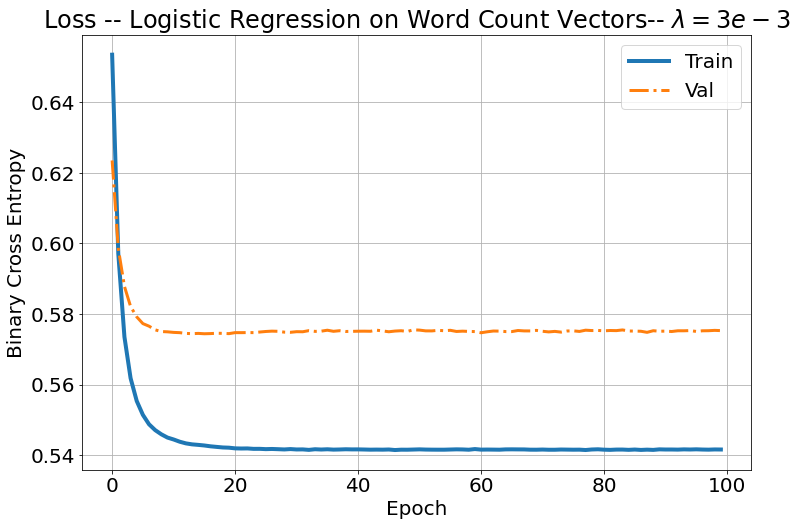

In [48]:
plt.title("Loss -- Logistic Regression on Word Count Vectors-- $\lambda = 3e-3$")

plt.plot(history_6.history["loss"], label = "Train", lw=4)
plt.plot(history_6.history["val_loss"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

So we have lower performance here.  Thus different values for l2 regularization will not get us higher accuracy for the validation set.

## Approach 2: Bag of Words Word Count Vectors and Multi-Layer Perception

In [49]:
train_bow_vectors.shape

(6471, 19365)

We start with a hidden layer that is about 1/10 the size of the input layer

In [65]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2000, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [66]:
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),
                         tf.keras.metrics.BinaryCrossentropy()])

In [67]:
history_7 = model_7.fit(x=train_bow_vectors.todense(), y=train_df["target"],
                        validation_data=(test_bow_vectors.todense(), test_df["target"]),
                        epochs=10)

Epoch 1/10
203/203 [==============================] - 33s 155ms/step - loss: 0.4889 - binary_accuracy: 0.7812 - binary_crossentropy: 0.4889 - val_loss: 0.4434 - val_binary_accuracy: 0.8074 - val_binary_crossentropy: 0.4434
Epoch 2/10
203/203 [==============================] - 30s 148ms/step - loss: 0.1663 - binary_accuracy: 0.9407 - binary_crossentropy: 0.1663 - val_loss: 0.5447 - val_binary_accuracy: 0.7758 - val_binary_crossentropy: 0.5447
Epoch 3/10
203/203 [==============================] - 30s 149ms/step - loss: 0.0703 - binary_accuracy: 0.9745 - binary_crossentropy: 0.0703 - val_loss: 0.6543 - val_binary_accuracy: 0.7723 - val_binary_crossentropy: 0.6543
Epoch 4/10
203/203 [==============================] - 30s 149ms/step - loss: 0.0447 - binary_accuracy: 0.9839 - binary_crossentropy: 0.0447 - val_loss: 0.7315 - val_binary_accuracy: 0.7785 - val_binary_crossentropy: 0.7315
Epoch 5/10
203/203 [==============================] - 31s 150ms/step - loss: 0.0416 - binary_accuracy: 0.984

Text(0, 0.5, 'Binary Cross Entropy')

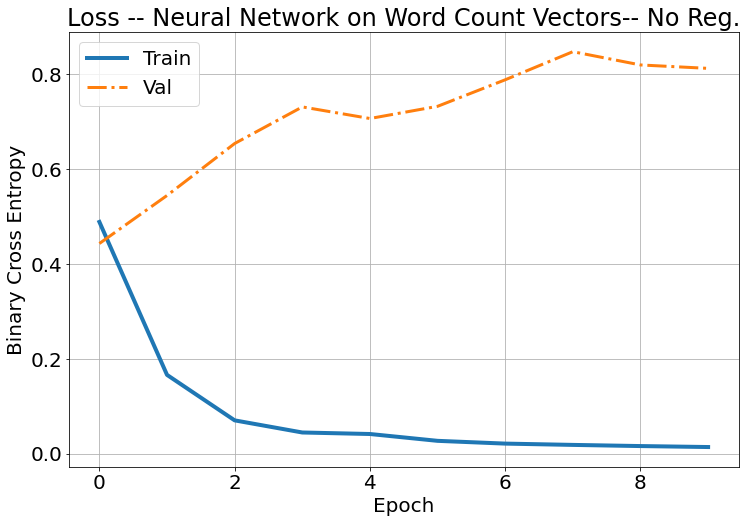

In [69]:
plt.title("Loss -- Neural Network on Word Count Vectors-- No Reg.")

plt.plot(history_7.history["binary_crossentropy"], label = "Train", lw=4)
plt.plot(history_7.history["val_binary_crossentropy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

Text(0, 0.5, 'Accuracy')

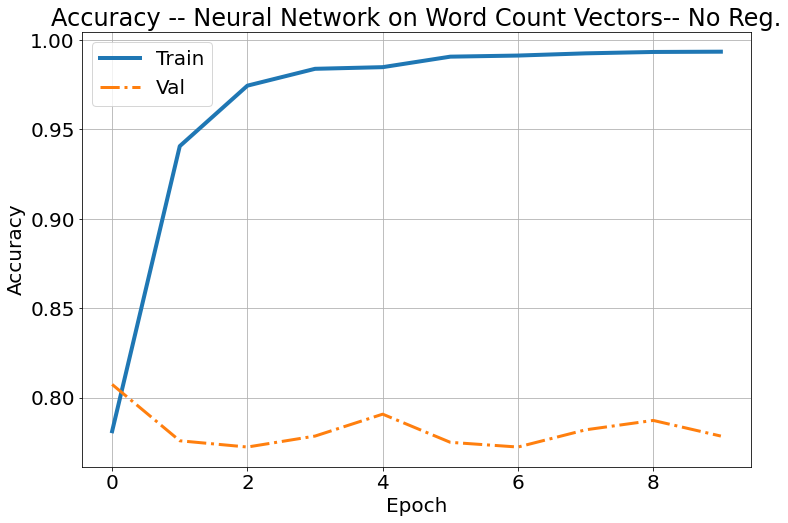

In [70]:
plt.title("Accuracy -- Neural Network on Word Count Vectors-- No Reg.")

plt.plot(history_7.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_7.history["val_binary_accuracy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

We add some regularization (starting with $\lambda =$ 1e-3)

In [72]:
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2000, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(1e-3))
])

In [73]:
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),
                         tf.keras.metrics.BinaryCrossentropy()])

In [74]:
history_8 = model_8.fit(x=train_bow_vectors.todense(), y=train_df["target"],
                        validation_data=(test_bow_vectors.todense(), test_df["target"]),
                        epochs=10)

Epoch 1/10
203/203 [==============================] - 48s 234ms/step - loss: 0.8220 - binary_accuracy: 0.7688 - binary_crossentropy: 0.5007 - val_loss: 0.7523 - val_binary_accuracy: 0.7837 - val_binary_crossentropy: 0.4718
Epoch 2/10
203/203 [==============================] - 46s 229ms/step - loss: 0.7075 - binary_accuracy: 0.8102 - binary_crossentropy: 0.4291 - val_loss: 0.7458 - val_binary_accuracy: 0.7890 - val_binary_crossentropy: 0.4581
Epoch 3/10
203/203 [==============================] - 45s 221ms/step - loss: 0.6745 - binary_accuracy: 0.8306 - binary_crossentropy: 0.4000 - val_loss: 0.7763 - val_binary_accuracy: 0.7723 - val_binary_crossentropy: 0.4844
Epoch 4/10
203/203 [==============================] - 46s 225ms/step - loss: 0.6416 - binary_accuracy: 0.8422 - binary_crossentropy: 0.3725 - val_loss: 0.7570 - val_binary_accuracy: 0.7758 - val_binary_crossentropy: 0.4801
Epoch 5/10
203/203 [==============================] - 45s 220ms/step - loss: 0.6088 - binary_accuracy: 0.855

Text(0, 0.5, 'Binary Cross Entropy')

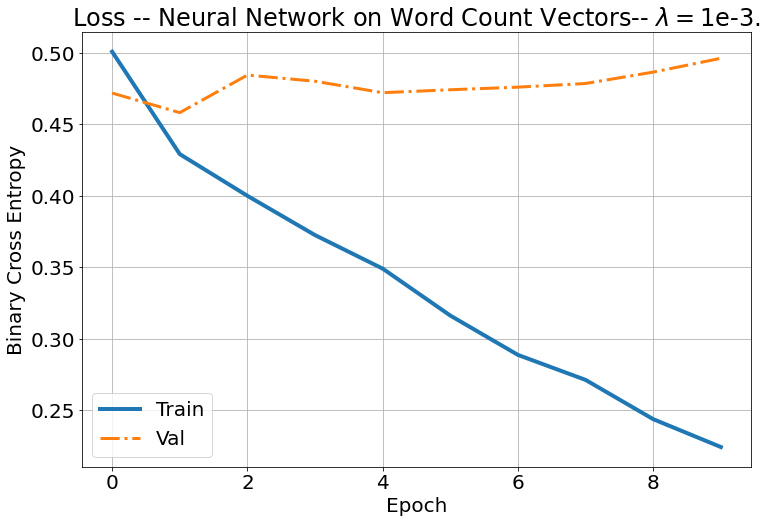

In [76]:
plt.title("Loss -- Neural Network on Word Count Vectors-- $\lambda = $1e-3.")

plt.plot(history_8.history["binary_crossentropy"], label = "Train", lw=4)
plt.plot(history_8.history["val_binary_crossentropy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

Text(0, 0.5, 'Binary Cross Entropy')

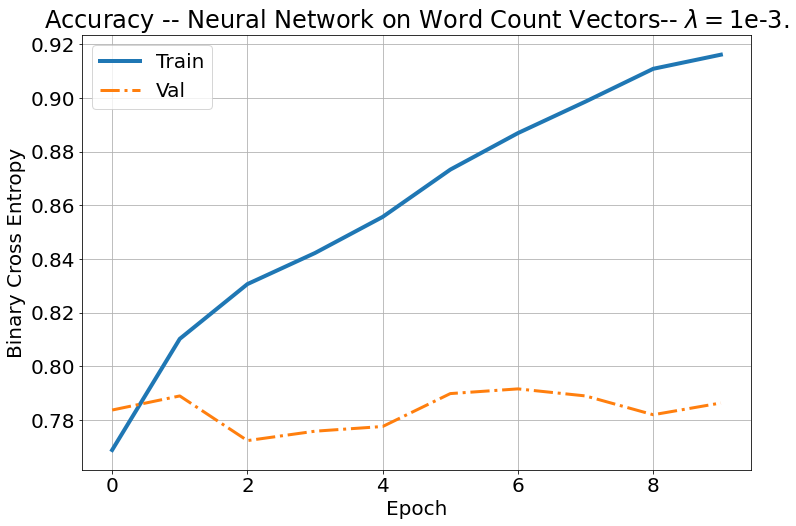

In [77]:
plt.title("Accuracy -- Neural Network on Word Count Vectors-- $\lambda =$1e-3.")

plt.plot(history_8.history["binary_accuracy"], label = "Train", lw=4)
plt.plot(history_8.history["val_binary_accuracy"], label = "Val", lw=3, ls='-.')
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy")

## Approach 3: TF-IDF

In [79]:
tfidf_vectorizer = TfidfVectorizer()

In [80]:
tfidf_vectors_train = tfidf_vectorizer.fit_transform(train_df["text"])

In [81]:
tfidf_vectors_test = tfidf_vectorizer.transform(test_df["text"])

In [82]:
tfidf_vectors_train.shape, tfidf_vectors_test.shape

((6471, 19365), (1142, 19365))

### TF-IDF only, logistic regression, no regularization

In [84]:
model_9 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid')])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_9 = model_9.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                        validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                        epochs=50)

Epoch 1/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6790 - binary_crossentropy: 0.6790 - binary_accuracy: 0.6257 - val_loss: 0.6631 - val_binary_crossentropy: 0.6631 - val_binary_accuracy: 0.6427
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6487 - binary_crossentropy: 0.6487 - binary_accuracy: 0.6551 - val_loss: 0.6404 - val_binary_crossentropy: 0.6404 - val_binary_accuracy: 0.6830
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_crossentropy: 0.6225 - binary_accuracy: 0.7260 - val_loss: 0.6216 - val_binary_crossentropy: 0.6216 - val_binary_accuracy: 0.7268
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.5988 - binary_crossentropy: 0.5988 - binary_accuracy: 0.7633 - val_loss: 0.6049 - val_binary_crossentropy: 0.6049 - val_binary_accuracy: 0.7443
Epoch 5/50
203/203 [==============================] - 1s 4ms/step - loss: 0.5772 - binary_crossentropy: 0.5772 - binary_

203/203 [==============================] - 1s 3ms/step - loss: 0.2739 - binary_crossentropy: 0.2739 - binary_accuracy: 0.9315 - val_loss: 0.4465 - val_binary_crossentropy: 0.4465 - val_binary_accuracy: 0.8091
Epoch 39/50
203/203 [==============================] - 1s 3ms/step - loss: 0.2694 - binary_crossentropy: 0.2694 - binary_accuracy: 0.9329 - val_loss: 0.4456 - val_binary_crossentropy: 0.4456 - val_binary_accuracy: 0.8074
Epoch 40/50
203/203 [==============================] - 1s 3ms/step - loss: 0.2651 - binary_crossentropy: 0.2651 - binary_accuracy: 0.9346 - val_loss: 0.4448 - val_binary_crossentropy: 0.4448 - val_binary_accuracy: 0.8074
Epoch 41/50
203/203 [==============================] - 1s 3ms/step - loss: 0.2608 - binary_crossentropy: 0.2608 - binary_accuracy: 0.9362 - val_loss: 0.4440 - val_binary_crossentropy: 0.4440 - val_binary_accuracy: 0.8074
Epoch 42/50
203/203 [==============================] - 1s 3ms/step - loss: 0.2567 - binary_crossentropy: 0.2567 - binary_accurac

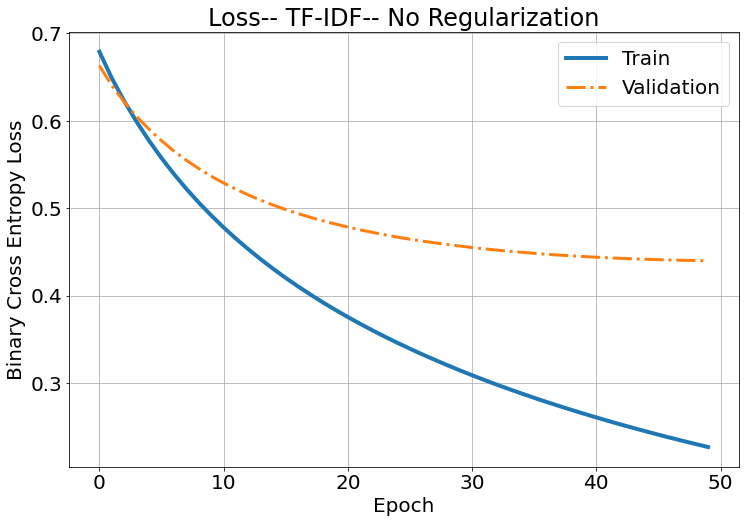

In [85]:
plt.title("Loss-- TF-IDF-- No Regularization")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.plot(history_9.history["loss"], label="Train", lw=4)
plt.plot(history_9.history["val_loss"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

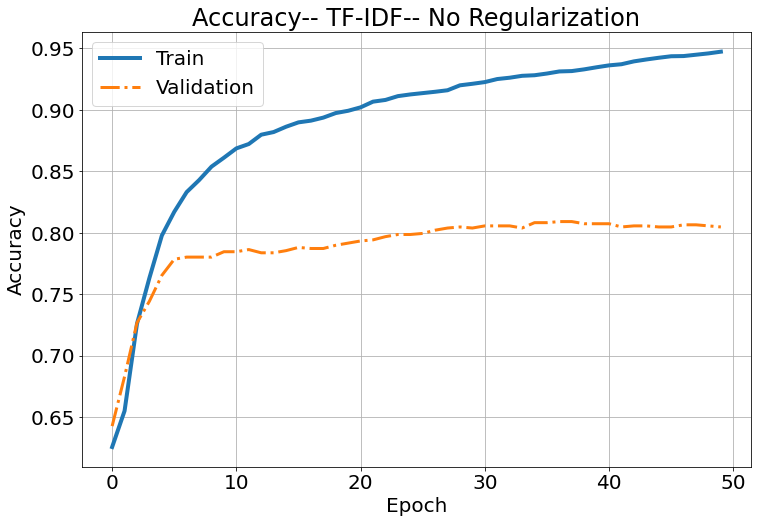

In [86]:
plt.title("Accuracy-- TF-IDF-- No Regularization")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_9.history["binary_accuracy"], label="Train", lw=4)
plt.plot(history_9.history["val_binary_accuracy"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

So overfit, but slightly better than we were getting from the word count vectors.

We now try with regularization

In [87]:
model_10 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid', 
                                                           kernel_regularizer=tf.keras.regularizers.l2(1e-3))])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_10 = model_10.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                          validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                          epochs=50)

Epoch 1/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6810 - binary_crossentropy: 0.6797 - binary_accuracy: 0.6127 - val_loss: 0.6681 - val_binary_crossentropy: 0.6649 - val_binary_accuracy: 0.6366
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_crossentropy: 0.6558 - binary_accuracy: 0.6378 - val_loss: 0.6560 - val_binary_crossentropy: 0.6477 - val_binary_accuracy: 0.6602
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_crossentropy: 0.6406 - binary_accuracy: 0.6665 - val_loss: 0.6491 - val_binary_crossentropy: 0.6358 - val_binary_accuracy: 0.6830
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6457 - binary_crossentropy: 0.6300 - binary_accuracy: 0.6824 - val_loss: 0.6448 - val_binary_crossentropy: 0.6272 - val_binary_accuracy: 0.6935
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6420 - binary_crossentropy: 0.6223 - binary_

203/203 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_crossentropy: 0.5942 - binary_accuracy: 0.7517 - val_loss: 0.6364 - val_binary_crossentropy: 0.5975 - val_binary_accuracy: 0.7329
Epoch 39/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_crossentropy: 0.5940 - binary_accuracy: 0.7540 - val_loss: 0.6363 - val_binary_crossentropy: 0.5973 - val_binary_accuracy: 0.7312
Epoch 40/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_crossentropy: 0.5939 - binary_accuracy: 0.7549 - val_loss: 0.6363 - val_binary_crossentropy: 0.5974 - val_binary_accuracy: 0.7338
Epoch 41/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6332 - binary_crossentropy: 0.5941 - binary_accuracy: 0.7541 - val_loss: 0.6363 - val_binary_crossentropy: 0.5974 - val_binary_accuracy: 0.7364
Epoch 42/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6332 - binary_crossentropy: 0.5940 - binary_accurac

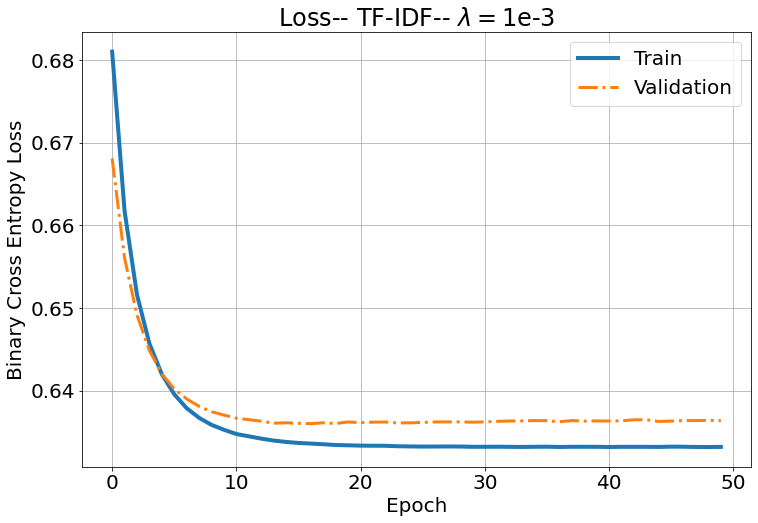

In [89]:
plt.title("Loss-- TF-IDF-- $\lambda=$1e-3")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.plot(history_10.history["loss"], label="Train", lw=4)
plt.plot(history_10.history["val_loss"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

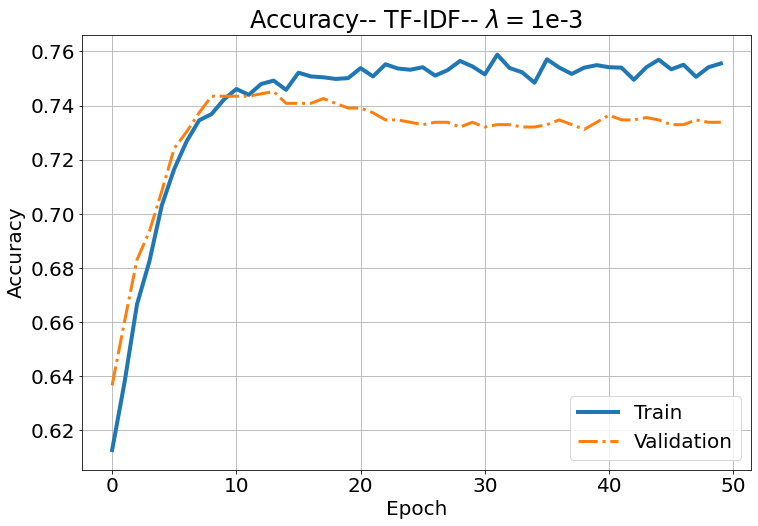

In [90]:
plt.title("Accuracy-- TF-IDF-- $\lambda=$1e-3")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_10.history["binary_accuracy"], label="Train", lw=4)
plt.plot(history_10.history["val_binary_accuracy"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

Here the regularization is too high

In [91]:
model_11 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid', 
                                                           kernel_regularizer=tf.keras.regularizers.l2(1e-5))])
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_11 = model_11.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                          validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                          epochs=50)

Epoch 1/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - binary_accuracy: 0.6022 - val_loss: 0.6635 - val_binary_crossentropy: 0.6634 - val_binary_accuracy: 0.6471
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6494 - binary_crossentropy: 0.6493 - binary_accuracy: 0.6711 - val_loss: 0.6409 - val_binary_crossentropy: 0.6407 - val_binary_accuracy: 0.6821
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_crossentropy: 0.6230 - binary_accuracy: 0.7194 - val_loss: 0.6222 - val_binary_crossentropy: 0.6218 - val_binary_accuracy: 0.7189
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6002 - binary_crossentropy: 0.5996 - binary_accuracy: 0.7602 - val_loss: 0.6061 - val_binary_crossentropy: 0.6053 - val_binary_accuracy: 0.7426
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.5794 - binary_crossentropy: 0.5784 - binary_

203/203 [==============================] - 0s 2ms/step - loss: 0.3371 - binary_crossentropy: 0.3035 - binary_accuracy: 0.9249 - val_loss: 0.4846 - val_binary_crossentropy: 0.4505 - val_binary_accuracy: 0.8056
Epoch 39/50
203/203 [==============================] - 1s 3ms/step - loss: 0.3349 - binary_crossentropy: 0.3002 - binary_accuracy: 0.9249 - val_loss: 0.4848 - val_binary_crossentropy: 0.4496 - val_binary_accuracy: 0.8056
Epoch 40/50
203/203 [==============================] - 1s 3ms/step - loss: 0.3328 - binary_crossentropy: 0.2970 - binary_accuracy: 0.9261 - val_loss: 0.4851 - val_binary_crossentropy: 0.4488 - val_binary_accuracy: 0.8074
Epoch 41/50
203/203 [==============================] - 0s 2ms/step - loss: 0.3307 - binary_crossentropy: 0.2939 - binary_accuracy: 0.9269 - val_loss: 0.4854 - val_binary_crossentropy: 0.4481 - val_binary_accuracy: 0.8074
Epoch 42/50
203/203 [==============================] - 1s 3ms/step - loss: 0.3288 - binary_crossentropy: 0.2910 - binary_accurac

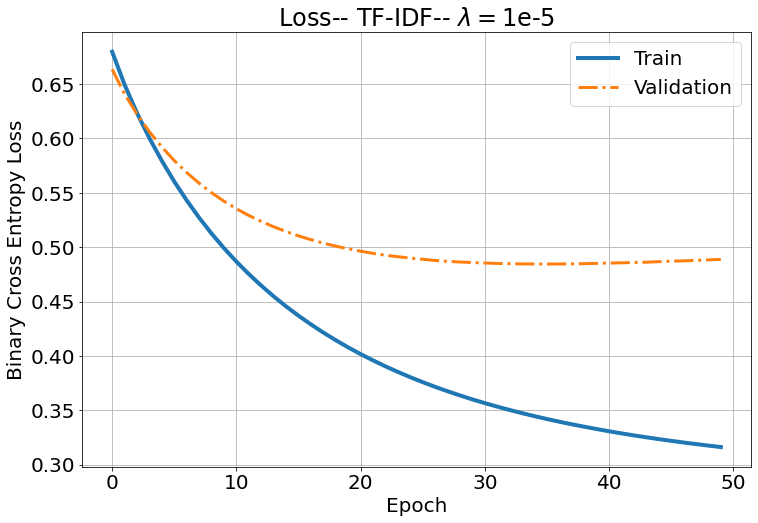

In [92]:
plt.title("Loss-- TF-IDF-- $\lambda=$1e-5")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.plot(history_11.history["loss"], label="Train", lw=4)
plt.plot(history_11.history["val_loss"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

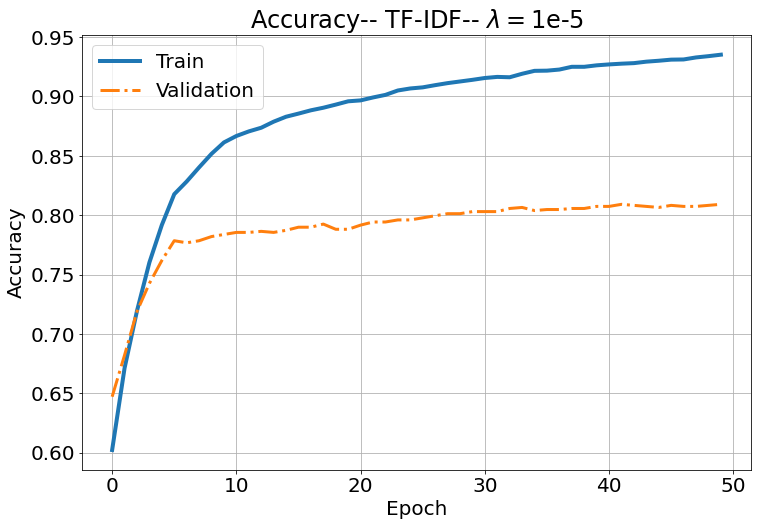

In [94]:
plt.title("Accuracy-- TF-IDF-- $\lambda=$1e-5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_11.history["binary_accuracy"], label="Train", lw=4)
plt.plot(history_11.history["val_binary_accuracy"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

In [93]:
model_12 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid', 
                                                           kernel_regularizer=tf.keras.regularizers.l2(1e-4))])
model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_12 = model_12.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                          validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                          epochs=50)

Epoch 1/50
203/203 [==============================] - 1s 4ms/step - loss: 0.6800 - binary_crossentropy: 0.6798 - binary_accuracy: 0.6095 - val_loss: 0.6639 - val_binary_crossentropy: 0.6635 - val_binary_accuracy: 0.6532
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6512 - binary_crossentropy: 0.6502 - binary_accuracy: 0.6730 - val_loss: 0.6430 - val_binary_crossentropy: 0.6413 - val_binary_accuracy: 0.6856
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6280 - binary_crossentropy: 0.6254 - binary_accuracy: 0.7242 - val_loss: 0.6268 - val_binary_crossentropy: 0.6232 - val_binary_accuracy: 0.7233
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6089 - binary_crossentropy: 0.6041 - binary_accuracy: 0.7585 - val_loss: 0.6140 - val_binary_crossentropy: 0.6080 - val_binary_accuracy: 0.7443
Epoch 5/50
203/203 [==============================] - 1s 3ms/step - loss: 0.5928 - binary_crossentropy: 0.5854 - binary_

203/203 [==============================] - 1s 3ms/step - loss: 0.4948 - binary_crossentropy: 0.4264 - binary_accuracy: 0.8737 - val_loss: 0.5555 - val_binary_crossentropy: 0.4868 - val_binary_accuracy: 0.7802
Epoch 39/50
203/203 [==============================] - 0s 2ms/step - loss: 0.4946 - binary_crossentropy: 0.4256 - binary_accuracy: 0.8727 - val_loss: 0.5557 - val_binary_crossentropy: 0.4864 - val_binary_accuracy: 0.7776
Epoch 40/50
203/203 [==============================] - 0s 2ms/step - loss: 0.4944 - binary_crossentropy: 0.4249 - binary_accuracy: 0.8734 - val_loss: 0.5557 - val_binary_crossentropy: 0.4860 - val_binary_accuracy: 0.7767
Epoch 41/50
203/203 [==============================] - 0s 2ms/step - loss: 0.4942 - binary_crossentropy: 0.4242 - binary_accuracy: 0.8739 - val_loss: 0.5558 - val_binary_crossentropy: 0.4855 - val_binary_accuracy: 0.7776
Epoch 42/50
203/203 [==============================] - 0s 2ms/step - loss: 0.4940 - binary_crossentropy: 0.4235 - binary_accurac

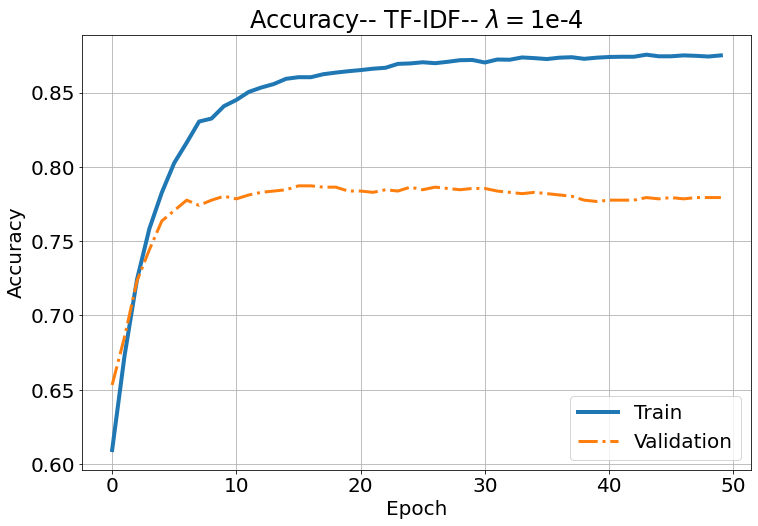

In [95]:
plt.title("Accuracy-- TF-IDF-- $\lambda=$1e-4")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_12.history["binary_accuracy"], label="Train", lw=4)
plt.plot(history_12.history["val_binary_accuracy"], label="Validation", lw=3, ls='-.')
plt.legend()
plt.grid()

In [96]:
model_13 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid', 
                                                           kernel_regularizer=tf.keras.regularizers.l2(3e-4))])
model_13.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_13 = model_13.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                          validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                          epochs=50)

Epoch 1/50
203/203 [==============================] - 1s 4ms/step - loss: 0.6803 - binary_crossentropy: 0.6798 - binary_accuracy: 0.6053 - val_loss: 0.6651 - val_binary_crossentropy: 0.6639 - val_binary_accuracy: 0.6454
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6543 - binary_crossentropy: 0.6516 - binary_accuracy: 0.6617 - val_loss: 0.6470 - val_binary_crossentropy: 0.6429 - val_binary_accuracy: 0.6751
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6358 - binary_crossentropy: 0.6297 - binary_accuracy: 0.7008 - val_loss: 0.6347 - val_binary_crossentropy: 0.6266 - val_binary_accuracy: 0.7005
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_crossentropy: 0.6122 - binary_accuracy: 0.7289 - val_loss: 0.6256 - val_binary_crossentropy: 0.6132 - val_binary_accuracy: 0.7347
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.6122 - binary_crossentropy: 0.5976 - binary_

203/203 [==============================] - 1s 2ms/step - loss: 0.5719 - binary_crossentropy: 0.5117 - binary_accuracy: 0.8286 - val_loss: 0.5949 - val_binary_crossentropy: 0.5347 - val_binary_accuracy: 0.7618
Epoch 39/50
203/203 [==============================] - 1s 3ms/step - loss: 0.5718 - binary_crossentropy: 0.5114 - binary_accuracy: 0.8289 - val_loss: 0.5948 - val_binary_crossentropy: 0.5344 - val_binary_accuracy: 0.7636
Epoch 40/50
203/203 [==============================] - 1s 3ms/step - loss: 0.5718 - binary_crossentropy: 0.5113 - binary_accuracy: 0.8269 - val_loss: 0.5948 - val_binary_crossentropy: 0.5343 - val_binary_accuracy: 0.7601
Epoch 41/50
203/203 [==============================] - 0s 2ms/step - loss: 0.5717 - binary_crossentropy: 0.5111 - binary_accuracy: 0.8292 - val_loss: 0.5948 - val_binary_crossentropy: 0.5343 - val_binary_accuracy: 0.7601
Epoch 42/50
203/203 [==============================] - 0s 2ms/step - loss: 0.5717 - binary_crossentropy: 0.5109 - binary_accurac

### Approach 4: TF-IDF with Hidden Layer

In [97]:
model_14 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=2000, activation='relu'),
                                       tf.keras.layers.Dense(units=1, activation='sigmoid')])
model_14.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                         tf.keras.metrics.BinaryAccuracy()])
history_14 = model_14.fit(x=tfidf_vectors_train.todense(), y=train_df["target"],
                          validation_data=(tfidf_vectors_test.todense(), test_df["target"]),
                          epochs=20)

Epoch 1/20
203/203 [==============================] - 32s 151ms/step - loss: 0.5017 - binary_crossentropy: 0.5017 - binary_accuracy: 0.7602 - val_loss: 0.4419 - val_binary_crossentropy: 0.4419 - val_binary_accuracy: 0.8109
Epoch 2/20
203/203 [==============================] - 31s 153ms/step - loss: 0.1826 - binary_crossentropy: 0.1826 - binary_accuracy: 0.9317 - val_loss: 0.5477 - val_binary_crossentropy: 0.5477 - val_binary_accuracy: 0.7706
Epoch 3/20
203/203 [==============================] - 32s 155ms/step - loss: 0.0627 - binary_crossentropy: 0.0627 - binary_accuracy: 0.9784 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845 - val_binary_accuracy: 0.7557
Epoch 4/20
203/203 [==============================] - 32s 158ms/step - loss: 0.0343 - binary_crossentropy: 0.0343 - binary_accuracy: 0.9876 - val_loss: 0.7607 - val_binary_crossentropy: 0.7607 - val_binary_accuracy: 0.7741
Epoch 5/20
125/203 [=================>............] - ETA: 11s - loss: 0.0261 - binary_crossentropy: 0.0261 

KeyboardInterrupt: 